In [2]:

import requests
import calendar
import time
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns




# this setting widens how many characters pandas will display in a column:
pd.options.display.max_colwidth = 400

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import re
import numpy as np
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB





from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer


from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.compose import ColumnTransformer



import data frame

In [ ]:
vaush_destiny_df = pd.read_csv('./data/vaush_destiny.csv')

In [ ]:
vaush_destiny_df

,Unnamed: 0,subreddit,selftext,title,created_utc,full_text,no_links,no_links_2
0,0,VaushV,"Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?",Anyone Noticing Vaush's Memory Issues Lately?,1668472458,"Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?","Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?","Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?"
1,1,VaushV,NaN,Would be a shame if this unofficial site received a lot of bad data,1668471465,Would be a shame if this unofficial site received a lot of bad data,Would be a shame if this unofficial site received a lot of bad data,Would be a shame if this unofficial site received a lot of bad data
2,2,VaushV,NaN,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,1668471209,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.
3,3,VaushV,"Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)",How do you feel about the global population reaching 8 billion?,1668470313,"How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. \n\n[View Poll](https://www.reddit.com/poll/yvgwwx)","How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. \n\nView Poll","How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. View Poll"
4,4,VaushV,"Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trump being held accountable or Stopping the rise o...",Hot take: Trump SHOULDN’T be arrested/indicted,1668468418,"Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up next\n\nAnd Every(and I mean EVERY) poll shows Desantis beating Biden\n\nMe personally, I think Desantis is infinitely more dangerous than Trump \n\nSo what’s more important? Trum...","Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would win\n\nBut if Trump gets arrested and is unable to

# Check word count and post length

In [ ]:

vaush_destiny_df['post_length']= vaush_destiny_df["no_links_2"].str.len()

In [ ]:
vaush_destiny_df['post_word_count'] = vaush_destiny_df['no_links_2'].str.split().str.len()

In [ ]:
vaush_destiny_df.drop(columns = ['selftext','title','created_utc','full_text','no_links','Unnamed: 0'],inplace = True)

## What's the distribution of post lengths?


In [ ]:
analyzer = SentimentIntensityAnalyzer()
vaush_destiny_df['compound'] = [analyzer.polarity_scores(x)['compound'] for x in vaush_destiny_df['no_links_2']]
vaush_destiny_df['neg'] = [analyzer.polarity_scores(x)['neg'] for x in vaush_destiny_df['no_links_2']]
vaush_destiny_df['neu'] = [analyzer.polarity_scores(x)['neu'] for x in vaush_destiny_df['no_links_2']]
vaush_destiny_df['pos'] = [analyzer.polarity_scores(x)['pos'] for x in vaush_destiny_df['no_links_2']]
#plagiarized from
#https://stackoverflow.com/questions/61608057/output-vader-sentiment-scores-in-columns-based-on-dataframe-rows-of-tweets

In [ ]:
vaush_destiny_df.to_csv('./data/vaush_destiny_cleaned.csv')

Fine day isn’t it fellow factorio enjoyers neg = 0, This score does not match with the negative sentament beign expressed 

I tried two different types of lemmatazation strategys below. The more complex one preformed better on most models

In [ ]:


from nltk.corpus import wordnet
lemmatizer = nltk.stem.WordNetLemmatizer()
wordnet_lemmatizer = WordNetLemmatizer()
stop = stopwords.words('english')

def nltk_tag_to_wordnet_tag(nltk_tag):
    if nltk_tag.startswith('J'):
        return wordnet.ADJ
    elif nltk_tag.startswith('V'):
        return wordnet.VERB
    elif nltk_tag.startswith('N'):
        return wordnet.NOUN
    elif nltk_tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def lemmatize_sentence(sentence):
    #tokenize the sentence and find the POS tag for each token
    nltk_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))
    #tuple of (token, wordnet_tag)
    wordnet_tagged = map(lambda x: (x[0], nltk_tag_to_wordnet_tag(x[1])), nltk_tagged)
    lemmatized_sentence = []
    for word, tag in wordnet_tagged:
        if tag is None:
            #if there is no available tag, append the token as is
            lemmatized_sentence.append(word)
        else:
            #else use the tag to lemmatize the token
            lemmatized_sentence.append(lemmatizer.lemmatize(word, tag))
    return " ".join(lemmatized_sentence)



# Lemmatizing
vaush_destiny_df['lem'] = vaush_destiny_df['no_links_2'].apply(lambda x: lemmatize_sentence(x))
##from https://stackoverflow.com/questions/51267166/lemmatization-pandas-python

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

def lemmatize_text(text):
    return [lemmatizer.lemmatize(w) for w in w_tokenizer.tokenize(text)]


vaush_destiny_df['lem_2'] = vaush_destiny_df['no_links_2'].apply(lemmatize_text)
#Fromhttps://stackoverflow.com/questions/47557563/lemmatization-of-all-pandas-cells

In [ ]:
vaush_destiny_df

,subreddit,no_links_2,post_length,post_word_count,compound,neg,neu,pos,lem,lem_2
0,VaushV,"Anyone Noticing Vaush's Memory Issues Lately? Seems like every time he makes an argument he says ""there was a study, I forget... it found something like... I'll have to read up on it again."" You know what D does this too. Can these streamers admit they don't have the time to learn things or are we supposed to believe they ACTUALLY read their sources cited. Or is this a rhetorical tactique?",392,71,0.2869,0.035,0.899,0.065,"Anyone Noticing Vaush 's Memory Issues Lately ? Seems like every time he make an argument he say `` there be a study , I forget ... it find something like ... I 'll have to read up on it again . '' You know what D do this too . Can these streamer admit they do n't have the time to learn thing or be we suppose to believe they ACTUALLY read their source cite . Or be this a rhetorical tactique ?","[Anyone, Noticing, Vaush's, Memory, Issues, Lately?, Seems, like, every, time, he, make, an, argument, he, say, ""there, wa, a, study,, I, forget..., it, found, something, like..., I'll, have, to, read, up, on, it, again."", You, know, what, D, doe, this, too., Can, these, streamer, admit, they, don't, have, the, time, to, learn, thing, or, are, we, supposed, to, believe, they, ACTUALLY, read, t..."
1,VaushV,Would be a shame if this unofficial site received a lot of bad data,68,14,-0.7650,0.398,0.602,0.000,Would be a shame if this unofficial site receive a lot of bad data,"[Would, be, a, shame, if, this, unofficial, site, received, a, lot, of, bad, data]"
2,VaushV,🏳️‍⚧️🏳️‍⚧️Trans colored boat at Disney World! Ron DeSantis would not approve.,78,11,0.0000,0.000,1.000,0.000,🏳️‍⚧️🏳️‍⚧️Trans color boat at Disney World ! Ron DeSantis would not approve .,"[🏳️‍⚧️🏳️‍⚧️Trans, colored, boat, at, Disney, World!, Ron, DeSantis, would, not, approve.]"
3,VaushV,"How do you feel about the global population reaching 8 billion? Personally, IDK. It just seems like too many people lol. View Poll",130,23,0.6081,0.078,0.661,0.261,"How do you feel about the global population reach 8 billion ? Personally , IDK . It just seem like too many people lol . View Poll","[How, do, you, feel, about, the, global, population, reaching, 8, billion?, Personally,, IDK., It, just, seems, like, too, many, people, lol., View, Poll]"
4,VaushV,"Hot take: Trump SHOULDN’T be arrested/indicted Right now, if Trump and Biden went for a rematch, Biden would winBut if Trump gets arrested and is unable to secure the republican nomination, we KNOW Desantis is up nextAnd Every(and I mean EVERY) poll shows Desantis beating BidenMe personally, I think Desantis is infinitely more dangerous than Trump So what’s more important? Trump being held acc...",443,71,-0.7458,0.142,0.796,0.061,"Hot take : Trump SHOULDN ’ T be arrested/indicted Right now , if Trump and Biden go for a rematch , Biden would winBut if Trump get arrest and be unable to secure the republican nomination , we KNOW Desantis be up nextAnd Every ( and I mean EVERY ) poll show Desantis beat BidenMe personally , I think Desantis be infinitely more dangerous than Trump So what ’ s more important ? Trump be hold ac...","[Hot, take:, Trump, SHOULDN’T, be, arrested/indicted, Right, now,, if, Trump, and, Biden, went, for, a, rematch,, Biden, would, winBut, if, Trump, get, arrested, and, is, unable, to, secure, the, republican, nomination,, we, KNOW, Desantis, is, up, nextAnd, Every(and, I, mean, EVERY), poll, show, Desantis, beating, BidenMe, personally,, I, think, Desantis, is, infinitely, more, dangerous, than..."
...,...,...,...,...,...,...,...,...,...,...
9929,Destiny,Fine day isn’t it fellow factorio enjoyers,43,7,0.6124,0.000,0.500,0.500,Fine day isn ’ t it fellow factorio enjoyer,"[Fine, day, isn’t, it, fellow, factorio, enjoyer]"
9930,Destiny,"How Destiny is damaging the autistic community, by using autism as an insult.",78,13,-0.7650,0.375,0.625,0.000,"How Destiny be damage the autistic community , by use autism as an

### Creating a transofmrer for text(did not get used)

In [ ]:
# transformer for categorical features
text_features = ['no_links_2']
text_transformer = Pipeline(
    [
        
        ('cvec', CountVectorizer(max_df = .9, max_features = 1300, min_df = 2, ngram_range = (1,2), stop_words = 'english' ))
    ]
)

### Creating a transofmrer for text(did not get used)

In [ ]:
# transformer for numerical features
numeric_features = ['post_word_count', 'compound']
numeric_transformer = Pipeline(
    [
        
        ('scaler', StandardScaler())
    ]
)

### Creating a preprocessor for text and numerical columns(did not get help)

Eric helped me to get a model working with numerical features but ultimatley the models tended to produce worse results

In [ ]:
preprocessor = ColumnTransformer(
    [
        ('cvec', CountVectorizer(max_df = .9, max_features = 1300, min_df = 2, ngram_range = (1,2), stop_words = 'english' ), 'no_links_2'),
        #('text', text_transformer, 
         # text_features),
        #('numericals', numeric_transformer, numeric_features),
        ('scaler', StandardScaler(),['post_length','post_word_count'] )
    ],
    remainder = 'passthrough'
)

In [ ]:
vaush_destiny_df.columns

Index(['subreddit', 'no_links_2', 'post_length', 'post_word_count', 'compound',
       'neg', 'neu', 'pos'],
      dtype='object')

Below is a train test split with post lenght and the compound sentiment anaylisis

In [ ]:
features = ['no_links_2', 'post_length','compound' ]

X = vaush_destiny_df[features]
y = vaush_destiny_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
# with all features
nb_pipe = Pipeline([
    ('preprocessing', preprocessor),
    ('nb', MultinomialNB())
])

In [ ]:
nb_pipe_params = {
    'nb__alpha': [0.01, 0.1, 0.5, 1.0, 10.0 ]
    #pre__cvec__param
}

In [ ]:
nb_gs = GridSearchCV(nb_pipe, param_grid = nb_pipe_params, n_jobs=-1)

In [ ]:
nb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cvec',
                                                                         CountVectorizer(max_df=0.9,
                                                                                         max_features=1300,
                                                                                         min_df=2,
                                                                                         ngram_range=(1,
                                                                                                      2),
                                                                                         stop_words='english'),
                                                                         'no_links_2')])),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1, param_grid={'nb__alpha': [0.01, 0.1, 0.5, 1.0, 10.0]})

In [ ]:
# I got 75 without the other two columns
nb_gs.score(X_train, y_train)

0.7476510067114094

In [ ]:
nb_gs.score(X_test, y_test)

0.7238325281803543

Below I have to different train test splits so I can refer back to them when creating different types of models

In [ ]:
X = vaush_destiny_df['lem']
y = vaush_destiny_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
features = ['no_links_2', 'post_length', 'post_word_count', 'compound',
       'neg', 'neu', 'pos' ]

X = vaush_destiny_df[features]
y = vaush_destiny_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
# with just the vector params
nb_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('nb', MultinomialNB())
])

In [ ]:

nb_pipe_params = {
    'cvec__stop_words': [None, stopwords.words('english'), 'english'],
    'cvec__max_features': [1000, 4000, 7000, 10000, 13000,16000,19000,22000],
    'cvec__min_df': [1, 2, 3],
    'cvec__max_df': [0.9, 0.95,1.0],
    'cvec__ngram_range': [(1, 1), (1, 2), (1,3), (2,3)]
}

In [ ]:

nb_gs = GridSearchCV(nb_pipe, param_grid = nb_pipe_params, n_jobs=-1)

In [ ]:

nb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('nb', MultinomialNB())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.9, 0.95, 1.0],
                         'cvec__max_features': [1000, 4000, 7000, 10000, 13000,
                                                16000, 19000, 22000],
                         'cvec__min_df': [1, 2, 3],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 3)],
                         'cvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english']})

In [ ]:

#Baseline accuracy is close to 50/50
y_train.value_counts(normalize=True)

Destiny    0.503356
VaushV     0.496644
Name: subreddit, dtype: float64

In [ ]:
#with lematization
nb_gs.score(X_test, y_test)

0.7624798711755234

In [ ]:
#without lematization
nb_gs.score(X_test, y_test) 

0.7540257648953301

In [ ]:
#with lematization
nb_gs.best_params_

{'cvec__max_df': 0.9,
 'cvec__max_features': 16000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

In [ ]:
#without lematization
nb_gs.best_params_ 

{'cvec__max_df': 0.9,
 'cvec__max_features': 13000,
 'cvec__min_df': 2,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': 'english'}

This cross val score was with lemmatizaiton. I did't run cross val everytime due to the longer runtimes

In [ ]:
cross_val_score(nb_gs,X_test, y_test).mean()

0.7089366846238722

## Naive Bayes with Lemmatizaiton 

In [ ]:
X = vaush_destiny_df['lem']
y = vaush_destiny_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
nb_pipe = Pipeline([
    ('cvec', CountVectorizer(max_df= 0.9,max_features = 16000, min_df=1, ngram_range =(1,1), stop_words='english' )),
    ('nb', MultinomialNB())
])



In [ ]:
nb_pipe.fit(X_train, y_train)

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=16000,
                                 stop_words='english')),
                ('nb', MultinomialNB())])

In [ ]:
nb_pipe.score(X_test,y_test)

0.7624798711755234

## RAndom Forest with numercial values 

In [ ]:
preprocessor = ColumnTransformer(
    [
        ('cvec', CountVectorizer(), 'no_links_2'),
        #('text', text_transformer, 
         # text_features),
        #('numericals', numeric_transformer, numeric_features),
        ('scaler', StandardScaler(),['compound','post_word_count'])
    ],
    remainder = 'passthrough'
)

In [ ]:
rf_pipe = Pipeline([
    ('prep', preprocessor),
    ('ss', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

In [ ]:
rf_pipe_params = {
    'rf__n_estimators':[50,100,150],
    'rf__max_depth':[None,5],
    'rf__min_samples_split':[2,5,10],
    'rf__ccp_alpha':[0,.01,.1],
    'prep__cvec__stop_words': ['english',stopwords.words('english')],
    'prep__cvec__max_features': [1000,5000,10_000,15_000],
    'prep__cvec__min_df': range(1,3,5),
    'prep__cvec__max_df': [.8, .9],
    'prep__cvec__ngram_range': [(1, 2)]
}

In [ ]:
rf_gs = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [ ]:
rf_gs.fit(X_train, y_train)


GridSearchCV(estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cvec',
                                                                         CountVectorizer(),
                                                                         'no_links_2'),
                                                                        ('scaler',
                                                                         StandardScaler(),
                                                                         ['compound',
                                                                          'post_word_count'])])),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'prep__cvec__max_df': [0.8, 0.9],
                         'prep__cvec__max_features': [1000, 5000, 10000, 15000],
                         'prep__cvec__min_df': range(1, 3, 5),
                         'prep__cvec__ngram_range': [(1, 2)],
                         'prep__cvec__stop_words': ['english'],
                         'rf__ccp_alpha': [0, 0.01, 0.1],
                         'rf__max_depth': [None, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [ ]:
rf_gs.score(X_test, y_test)

0.7383252818035426

In [ ]:
rf_gs.score(X_train, y_train)

0.9892617449664429

In [ ]:
cross_val_score(rf_gs,X_test, y_test).mean()

0.6811514246770948

In [ ]:
rf_gs.best_params_

{'prep__cvec__max_df': 0.9,
 'prep__cvec__max_features': 10000,
 'prep__cvec__min_df': 1,
 'prep__cvec__ngram_range': (1, 2),
 'prep__cvec__stop_words': 'english',
 'rf__ccp_alpha': 0,
 'rf__max_depth': None,
 'rf__min_samples_split': 10,
 'rf__n_estimators': 150}

## Random Forest with Lematizaiton 

In [ ]:
X = vaush_destiny_df['lem']
y = vaush_destiny_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
rf_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

In [ ]:
rf_pipe_params = {
    'rf__n_estimators':[50,100,150],
    'rf__max_depth':[None,5],
    'rf__min_samples_split':[2,5,10],
    'rf__ccp_alpha':[0,.01,.1],
    'cvec__stop_words': ['english',stopwords.words('english')],
    'cvec__max_features': [8000,10_000,15_000],
    'cvec__min_df': range(1,3,5),
    'cvec__max_df': [.8, .9],
    'cvec__ngram_range': [(1, 2)]
}

In [ ]:
rf_gs_lem = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [ ]:
rf_gs_lem.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.8, 0.9],
                         'cvec__max_features': [8000, 10000, 15000],
                         'cvec__min_df': range(1, 3, 5),
                         'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': ['english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]],
                         'rf__ccp_alpha': [0, 0.01, 0.1],
                         'rf__max_depth': [None, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [ ]:
rf_gs_lem.score(X_test, y_test)

0.751207729468599

## The random forest was better withour the additional columns as well

In [ ]:
rf_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('rf', RandomForestClassifier())
])

In [ ]:
rf_pipe_params = {
    'rf__n_estimators':[50,100,150],
    'rf__max_depth':[None,5],
    'rf__min_samples_split':[2,5,10],
    'rf__ccp_alpha':[0,.01,.1],
    'cvec__stop_words': ['english',stopwords.words('english')],
    'cvec__max_features': [8000,10_000,15_000],
    'cvec__min_df': range(1,3,5),
    'cvec__max_df': [.8, .9],
    'cvec__ngram_range': [(1, 2)]
}

In [ ]:
rf_gs2 = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [ ]:
rf_gs2.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('rf', RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.8, 0.9],
                         'cvec__max_features': [8000, 10000, 15000],
                         'cvec__min_df': range(1, 3, 5),
                         'cvec__ngram_range': [(1, 2)],
                         'cvec__stop_words': ['english',
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...]],
                         'rf__ccp_alpha': [0, 0.01, 0.1],
                         'rf__max_depth': [None, 5],
                         'rf__min_samples_split': [2, 5, 10],
                         'rf__n_estimators': [50, 100, 150]})

In [ ]:
rf_gs2.score(X_train, y_train)

0.9818791946308725

In [ ]:
rf_gs2.score(X_test, y_test)

0.749194847020934

In [ ]:
rf_gs2.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=15000,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0, min_samples_split=5))])

# Losgitic Regression no lemmatization

In [ ]:
X = vaush_destiny_df['no_links_2']
y = vaush_destiny_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
lr_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss',StandardScaler(with_mean=False)),
    ('lr', LogisticRegression(max_iter = 10000))
])

In [ ]:
lr_pipe_params = {
    'lr__C':[.1,1,2,5,10],
    'cvec__stop_words': ['english'],
    'cvec__max_features': [1000,5000,10000,15000],
    'cvec__min_df': [1,3,5,10],
    'cvec__max_df': [.7,.8, .9],
    'cvec__ngram_range': [(1,1),(1, 2),(1,3)]
}

In [ ]:
lr_gs = GridSearchCV(lr_pipe, param_grid = lr_pipe_params, n_jobs=-1)


In [ ]:

lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('lr',
                                        LogisticRegression(max_iter=10000))]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.7, 0.8, 0.9],
                         'cvec__max_features': [1000, 5000, 10000, 15000],
                         'cvec__min_df': [1, 3, 5, 10],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3)],
                         'cvec__stop_words': ['english'],
                         'lr__C': [0.1, 1, 2, 5, 10]})

In [ ]:

lr_gs.score(X_test, y_test)

0.6980676328502415

In [ ]:
lr_gs.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 15000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english',
 'lr__C': 0.1}

In [ ]:
cross_val_score(lr_gs,X_test, y_test).mean()

0.650164697864607

# LEMATIZE ADA Boost

In [ ]:
X = vaush_destiny_df['lem']
y = vaush_destiny_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
boost_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('boost', AdaBoostClassifier())
])

In [ ]:
boost_pipe_params = {
    'boost__n_estimators': [30, 50, 70,80],
    'boost__base_estimator':[None,LogisticRegression()],
    'cvec__stop_words': ['english'],
    'cvec__max_features': [1000,2000,5000,8000,11000,14000,15000,18000,22000],
    'cvec__min_df': [1,3,5,7],
    'cvec__max_df': [.7, .8, .9],
    'cvec__ngram_range': [(1,1),(1, 2),(1,3),(2,3),(2,2)]
}

In [ ]:
boost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)


In [ ]:
boost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [ ]:
boost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('boost', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'boost__base_estimator': [None, LogisticRegression()],
                         'boost__n_estimators': [30, 50, 70, 80],
                         'cvec__max_df': [0.7, 0.8, 0.9],
                         'cvec__max_features': [1000, 2000, 5000, 8000, 11000,
                                                14000, 15000, 18000, 22000],
                         'cvec__min_df': [1, 3, 5, 7],
                         'cvec__ngram_range': [(1, 1), (1, 2), (1, 3), (2, 3),
                                               (2, 2)],
                         'cvec__stop_words': ['english']})

In [ ]:
boost_gs.score(X_test, y_test)

0.717391304347826

In [ ]:
boost_gs.best_params_

{'boost__base_estimator': LogisticRegression(),
 'boost__n_estimators': 30,
 'cvec__max_df': 0.7,
 'cvec__max_features': 5000,
 'cvec__min_df': 5,
 'cvec__ngram_range': (1, 1),
 'cvec__stop_words': 'english'}

# NOT LEMATIZED ADA BOOST

In [ ]:
boost_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('boost', AdaBoostClassifier())
])

In [ ]:
boost_pipe_params = {
    'boost__n_estimators': [30, 50, 70,80],
    'boost__base_estimator':[None,LogisticRegression()],
    'cvec__stop_words': ['english'],
    'cvec__max_features': [1000,2000,5000,8000,11000,14000,15000,18000,22000],
    'cvec__min_df': [1,3,5,7],
    'cvec__max_df': [.7, .8, .9],
    'cvec__ngram_range': [(1,1),(1, 2),(1,3)(2,3)(2,2)]
}

In [ ]:

boost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [ ]:

boost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('boost', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'boost__base_estimator': [None, LogisticRegression()],
                         'boost__n_estimators': [30, 50, 70],
                         'cvec__max_df': [0.7, 0.8, 0.9],
                         'cvec__max_features': [1000, 2000, 5000],
                         'cvec__min_df': [1, 3, 5, 7],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': ['english']})

In [ ]:
cross_val_score(boost_gs,X_test, y_test).mean()

0.6674587849678718

### INSTALL XGBOOST

In [ ]:
!pip install xgboost


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 19.8 MB/s eta 0:00:00a 0:00:01


In [ ]:
import xgboost as xgb

In [ ]:
X = vaush_destiny_df['no_links_2']
y = vaush_destiny_df['subreddit'].map(dict(Destiny=1, VaushV=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
print(y)

0       0
1       0
2       0
3       0
4       0
       ..
9929    1
9930    1
9931    1
9932    1
9933    1
Name: subreddit, Length: 9934, dtype: int64


## XGBOOST WITH LEMMATIZER

In [ ]:
X = vaush_destiny_df['lem']
y = vaush_destiny_df['subreddit'].map(dict(Destiny=1, VaushV=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
xboost_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('xboost', xgb.XGBClassifier())
])

In [ ]:
xboost_pipe_params = {
    'cvec__stop_words': [None, stopwords.words('english'),'english'],
    'cvec__max_features': [1000,2000,5000,8000,13000,16000,30000,50000,100000],
    'cvec__min_df': [1,3,5,7],
    'cvec__max_df': [.7, .8, .9],
    'cvec__ngram_range': [(1,1),(1, 2)]
}

In [ ]:
xboost_gs_lem = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [ ]:

xboost_gs_lem.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('boost', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.7, 0.8, 0.9],
                         'cvec__max_features': [1000, 2000, 5000, 8000, 13000,
                                                16000, 30000, 50000, 100000],
                         'cvec__min_df': [1, 3, 5, 7],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english']})

In [ ]:
xboost_gs_lem.score(X_test, y_test)

0.6964573268921095

## XGBOOST NO LEMATIZER

In [ ]:
 y.values.reshape(-1, 1)

In [ ]:
xgbc0 = xgb.XGBClassifier(objective='binary:logistic',
                          booster='gbtree',
                          eval_metric='auc',
                          tree_method='hist',
                          grow_policy='lossguide',
                          use_label_encoder=False)
#https://towardsdatascience.com/binary-classification-xgboost-hyperparameter-tuning-scenarios-by-non-exhaustive-grid-search-and-c261f4ce098d

In [ ]:
xboost_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('xboost', xgb.XGBClassifier())
])

In [ ]:
xboost_pipe_params = {
    'cvec__stop_words': [None, stopwords.words('english'),'english'],
    'cvec__max_features': [1000,2000,5000,8000,13000,16000,30000,50000,100000],
    'cvec__min_df': [1,3,5,7],
    'cvec__max_df': [.7, .8, .9],
    'cvec__ngram_range': [(1,1),(1, 2)]
}

In [ ]:
xboost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)


In [ ]:

xboost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('boost', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.7, 0.8, 0.9],
                         'cvec__max_features': [1000, 2000, 5000, 8000, 13000,
                                                16000, 30000, 50000, 100000],
                         'cvec__min_df': [1, 3, 5, 7],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english']})

In [ ]:
xboost_gs.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 2000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',

In [ ]:
boost_gs.best_params_

{'cvec__max_df': 0.7,
 'cvec__max_features': 8000,
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',

In [ ]:
xboost_gs.score(X_test, y_test)

0.6964573268921095

In [ ]:
xboost_gs.score(X_train, y_train)

0.7174496644295302

In [ ]:
xboost_gs.score(X_train, y_train)
#first attempt score 

0.8122147651006711

In [ ]:
 # deccent score

In [ ]:
xboost_gs.score(X_test, y_test)

0.7326892109500805

## Below I loaded in the best estimators to save them if my kernal crashed and to load them inton stacked models

In [ ]:
nb_gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=16000,
                                 stop_words='english')),
                ('nb', MultinomialNB())])

In [ ]:
xboost_gs.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.7, max_features=2000,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('boost', AdaBoostClassifier())])

In [ ]:
rf_gs.best_estimator_

Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cvec',
                                                  CountVectorizer(max_df=0.8,
                                                                  max_features=15000,
                                                                  ngram_range=(1,
                                                                               2),
                                                                  stop_words='english'),
                                                  'no_links_2'),
                                                 ('scaler', StandardScaler(),
                                                  ['compound',
                                                   'post_word_count'])])),
                ('ss', StandardScaler(with_mean=False)),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0, min_samples_split=5))])

In [ ]:
# Stacked Model 1 This model performed the best of the stacked models and did not use lemmatization 

In [ ]:
level1_estimators = [
    ('xb', xboost_gs.best_estimator_),
    ('nb', nb_gs.best_estimator_),
    ('rf', rf_gs2.best_estimator_),
    ('pipe', Pipeline([
        ('cvec', CountVectorizer(ngram_range=(1,1),stop_words='english',min_df=5,max_features=5000,max_df=0.7)),
        ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=30))
    ]))
   
]

stacked_model = StackingClassifier(estimators=level1_estimators,
                                 final_estimator=LogisticRegression())


In [ ]:
stacked_model.fit(X_train, y_train)


StackingClassifier(estimators=[('xb',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=2000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words=['i',
                                                                             'me',
                                                                             'my',
                                                                             'myself',
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                             'you',
                                                                             "you're",
                                                                             "you've",
                                                                             "you'll",
                                                                             "you'd",
                                                                             'your',
                                                                             'yours',
                                                                             'yourself',
                                                                             'yourselves',
                                                                             'he',
                                                                             'him',
                                                                             'his',
                                                                             'himself',
                                                                             'she',
                                                                             "she's",
                                                                             'her',
                                                                             'hers',
                                                                             'herself',
                                                                             'it',
                                                                             "it's",
                                                                             'its'...
                                                                             'itself', ...])),
                                                ('ss',
                                                 StandardScaler(with_mean=False)),
                                                ('rf',
                                                 RandomForestClassifier(ccp_alpha=0,
                                                                        min_samples_split=5))])),
                               ('pipe',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=5000,
                                                                 min_df=5,
                                                                 stop_words='english')),
                                                ('ada',
                                                 AdaBoostClassifier(base_estimator=LogisticRegression(),
                                                

In [ ]:
stacked_model.score(X_train, y_train)

0.9546308724832214

In [ ]:
stacked_model.score(X_test, y_test)

0.7588566827697263

In [ ]:

# Stacked Model 2

In [ ]:
level1_estimators = [
    #('xb', xboost_gs.best_estimator_),
    ('nb', nb_gs.best_estimator_),
    ('rf', rf_gs2.best_estimator_),
    ('pipe', Pipeline([
        ('cvec', CountVectorizer(ngram_range=(1,1),stop_words='english',min_df=5,max_features=5000,max_df=0.7)),
        ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=30))
    ]))
   
]

stacked_model2 = StackingClassifier(estimators=level1_estimators,
                                 final_estimator=LogisticRegression())


In [ ]:
stacked_model2.fit(X_train, y_train)

StackingClassifier(estimators=[('nb',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.9,
                                                                 max_features=16000,
                                                                 stop_words='english')),
                                                ('nb', MultinomialNB())])),
                               ('rf',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.9,
                                                                 max_features=15000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words=['i',
                                                                             'me',
                                                                             'my',
                                                                             'myself',
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                             'you',
                                                                             "you're",
                                                                             "you've",
                                                                             "you'll",
                                                                             "y...
                                                                             'itself', ...])),
                                                ('ss',
                                                 StandardScaler(with_mean=False)),
                                                ('rf',
                                                 RandomForestClassifier(ccp_alpha=0,
                                                                        min_samples_split=5))])),
                               ('pipe',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=5000,
                                                                 min_df=5,
                                                                 stop_words='english')),
                                                ('ada',
                                                 AdaBoostClassifier(base_estimator=LogisticRegression(),
                                                                    n_estimators=30))]))],
                   final_estimator=LogisticRegression())

In [ ]:
stacked_model2.score(X_test, y_test)

0.7568438003220612

In [ ]:
# Stacked Model 3

In [ ]:
level1_estimators = [
    ('xb', xboost_gs.best_estimator_),
    ('nb', nb_gs.best_estimator_),
    ('rf', rf_gs2.best_estimator_),
    #('pipe', Pipeline([
        #('cvec', CountVectorizer(ngram_range=(1,1),stop_words='english',min_df=5,max_features=5000,max_df=0.7)),
        #('ada', AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=30))
    #]))
   
]

stacked_model3 = StackingClassifier(estimators=level1_estimators,
                                 final_estimator=LogisticRegression())


In [ ]:
stacked_model3.fit(X_train, y_train)

StackingClassifier(estimators=[('xb',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=2000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words=['i',
                                                                             'me',
                                                                             'my',
                                                                             'myself',
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                             'you',
                                                                             "you're",
                                                                             "you've",
                                                                             "you'll",
                                                                             "you'd",
                                                                             'your',
                                                                             'yours',
                                                                             'yourself',
                                                                             'yourselves',
                                                                             'he',
                                                                             'him',
                                                                             'his',
                                                                             'himself',
                                                                             'she',
                                                                             "she's",
                                                                             'her',
                                                                             'hers',
                                                                             'herself',
                                                                             'it',
                                                                             "it's",
                                                                             'its'...
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                             'you',
                                                                             "you're",
                                                                             "you've",
                                                                             "you'll",
                                                                             "you'd",
                                                                             'your',
                                                                             'yours',
                                                                             'yourself',
                                                                     

In [ ]:
stacked_model3.score(X_test, y_test)

0.7584541062801933

In [ ]:
# Stacked Model 4

In [ ]:
level1_estimators = [
    ('xb', xboost_gs.best_estimator_),
    #('nb', nb_gs.best_estimator_),
    ('rf', rf_gs2.best_estimator_),
    ('pipe', Pipeline([
        ('cvec', CountVectorizer(ngram_range=(1,1),stop_words='english',min_df=5,max_features=5000,max_df=0.7)),
        ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=30))
    ]))
   
]

stacked_model4 = StackingClassifier(estimators=level1_estimators,
                                 final_estimator=LogisticRegression())

In [ ]:
stacked_model4.fit(X_train, y_train)

StackingClassifier(estimators=[('xb',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=2000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words=['i',
                                                                             'me',
                                                                             'my',
                                                                             'myself',
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                             'you',
                                                                             "you're",
                                                                             "you've",
                                                                             "you'll",
                                                                             "you'd",
                                                                             'your',
                                                                             'yours',
                                                                             'yourself',
                                                                             'yourselves',
                                                                             'he',
                                                                             'him',
                                                                             'his',
                                                                             'himself',
                                                                             'she',
                                                                             "she's",
                                                                             'her',
                                                                             'hers',
                                                                             'herself',
                                                                             'it',
                                                                             "it's",
                                                                             'its'...
                                                                             'itself', ...])),
                                                ('ss',
                                                 StandardScaler(with_mean=False)),
                                                ('rf',
                                                 RandomForestClassifier(ccp_alpha=0,
                                                                        min_samples_split=5))])),
                               ('pipe',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=5000,
                                                                 min_df=5,
                                                                 stop_words='english')),
                                                ('ada',
                                                 AdaBoostClassifier(base_estimator=LogisticRegression(),
                                                

In [ ]:
stacked_model4.score(X_test, y_test)

0.7479871175523349

In [ ]:
# Stacked Model 5

In [ ]:
level1_estimators = [
    ('xb', xboost_gs.best_estimator_),
    ('nb', nb_gs.best_estimator_),
    #('rf', rf_gs2.best_estimator_),
    ('pipe', Pipeline([
        ('cvec', CountVectorizer(ngram_range=(1,1),stop_words='english',min_df=5,max_features=5000,max_df=0.7)),
        ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=30))
    ]))
   
]

stacked_model5 = StackingClassifier(estimators=level1_estimators,
                                 final_estimator=LogisticRegression())

In [ ]:
stacked_model5.fit(X_train, y_train)

StackingClassifier(estimators=[('xb',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=2000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words=['i',
                                                                             'me',
                                                                             'my',
                                                                             'myself',
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                             'you',
                                                                             "you're",
                                                                             "you've",
                                                                             "you'll",
                                                                             "you'd",
                                                                             'your',
                                                                             'yours',
                                                                             'yourself',
                                                                             'yourselves',
                                                                             'he',
                                                                             'him',
                                                                             'his',
                                                                             'himself',
                                                                             'she',
                                                                             "she's",
                                                                             'her',
                                                                             'hers',
                                                                             'herself',
                                                                             'it',
                                                                             "it's",
                                                                             'its'...
                               ('nb',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.9,
                                                                 max_features=16000,
                                                                 stop_words='english')),
                                                ('nb', MultinomialNB())])),
                               ('pipe',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=5000,
                                                                 min_df=5,
                                                                 stop_words='english')),
                                                ('ada',
                                                 AdaBoostClassifier(base_estimator=LogisticRegression(),
                                                                    n_estimators=30))]))],
      

In [ ]:
stacked_model5.score(X_test, y_test)

0.7479871175523349

## XGBOOST With original PARAMS

In [ ]:
xboost_pipe = Pipeline([
    ('cvec', CountVectorizer()),
    ('ss', StandardScaler(with_mean=False)),
    ('xboost', xgb.XGBClassifier())
])

In [ ]:
xboost_pipe_params = {'cvec__max_df': 0.7,
 'cvec__max_features':[ 8000,9000,10000],
 'cvec__min_df': 1,
 'cvec__ngram_range': (1, 2),
 'cvec__stop_words': ['i',
  'me',
  'my',
  'myself',
  'we',
  'our',
  'ours',
  'ourselves',
  'you',
  "you're",
  "you've",
  "you'll",
  "you'd",
  'your',
  'yours',
  'yourself',
  'yourselves',
  'he',
  'him',
  'his',
  'himself',
  'she',
  "she's",
  'her',
  'hers',
  'herself',
  'it',
  "it's",
  'its',
  'itself',
  'they',
  'them',
  'their',
  'theirs',
  'themselves',
  'what',
  'which',
  'who',
  'whom',
  'this',
  'that',
  "that'll",
  'these',
  'those',
  'am',
  'is',
  'are',
  'was',
  'were',
  'be',
  'been',
  'being',
  'have',
  'has',
  'had',
  'having',
  'do',
  'does',
  'did',
  'doing',
  'a',
  'an',
  'the',
  'and',
  'but',
  'if',
  'or',
  'because',
  'as',
  'until',
  'while',
  'of',
  'at',
  'by',
  'for',
  'with',
  'about',
  'against',
  'between',
  'into',
  'through',
  'during',
  'before',
  'after',
  'above',
  'below',
  'to',
  'from',
  'up',
  'down',
  'in',
  'out',
  'on',
  'off',
  'over',
  'under',
  'again',
  'further',
  'then',
  'once',
  'here',
  'there',
  'when',
  'where',
  'why',
  'how',
  'all',
  'any',
  'both',
  'each',
  'few',
  'more',
  'most',
  'other',
  'some',
  'such',
  'no',
  'nor',
  'not',
  'only',
  'own',
  'same',
  'so',
  'than',
  'too',
  'very',
  's',
  't',
  'can',
  'will',
  'just',
  'don',
  "don't",
  'should',
  "should've",
  'now',
  'd',
  'll',
  'm',
  'o',
  're',
  've',
  'y',
  'ain',
  'aren',
  "aren't",
  'couldn',
  "couldn't",
  'didn',
  "didn't",
  'doesn',
  "doesn't",
  'hadn',
  "hadn't",
  'hasn',
  "hasn't",
  'haven',
  "haven't",
  'isn',
  "isn't",
  'ma',
  'mightn',
  "mightn't",
  'mustn',
  "mustn't",
  'needn',
  "needn't",
  'shan',
  "shan't",
  'shouldn',
  "shouldn't",
  'wasn',
  "wasn't",
  'weren',
  "weren't",
  'won',
  "won't",
  'wouldn',
  "wouldn't"]}

In [ ]:
xboost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [ ]:
xboost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('cvec', CountVectorizer()),
                                       ('ss', StandardScaler(with_mean=False)),
                                       ('boost', AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'cvec__max_df': [0.7, 0.8, 0.9],
                         'cvec__max_features': [1000, 2000, 5000, 8000, 13000,
                                                16000, 30000, 50000, 100000],
                         'cvec__min_df': [1, 3, 5, 7],
                         'cvec__ngram_range': [(1, 1), (1, 2)],
                         'cvec__stop_words': [None,
                                              ['i', 'me', 'my', 'myself', 'we',
                                               'our', 'ours', 'ourselves',
                                               'you', "you're", "you've",
                                               "you'll", "you'd", 'your',
                                               'yours', 'yourself',
                                               'yourselves', 'he', 'him', 'his',
                                               'himself', 'she', "she's", 'her',
                                               'hers', 'herself', 'it', "it's",
                                               'its', 'itself', ...],
                                              'english']})

In [ ]:
xboost_gs.score(X_test, y_test)

0.6964573268921095

In [ ]:
xboost_gs.score(X_train, y_train)

0.7174496644295302

## Stacked lemmatized model

In [ ]:
xboost_gs_lem.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.7, max_features=100000,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('boost', AdaBoostClassifier())])

In [ ]:
nb_pipe

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=16000,
                                 stop_words='english')),
                ('nb', MultinomialNB())])

In [ ]:
rf_gs_lem.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.8, max_features=15000,
                                 ngram_range=(1, 2), stop_words='english')),
                ('ss', StandardScaler(with_mean=False)),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0, min_samples_split=10))])

In [ ]:
X = vaush_destiny_df['no_links_2']
y = vaush_destiny_df['subreddit'].map(dict(Destiny=1, VaushV=0))

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,
                                                    stratify=y)

In [ ]:
level1_estimators = [
    ('xb', xboost_gs_lem.best_estimator_),
    ('nb', nb_pipe),
    ('rf', rf_gs_lem.best_estimator_),
    ('pipe', Pipeline([
        ('cvec', CountVectorizer(ngram_range=(1,1),stop_words='english',min_df=5,max_features=5000,max_df=0.7)),
        ('ada', AdaBoostClassifier(base_estimator=LogisticRegression(),n_estimators=30))
    ]))
   
]

stacked_model_lem = StackingClassifier(estimators=level1_estimators,
                                 final_estimator=LogisticRegression())


In [ ]:
stacked_model_lem.fit(X_train, y_train)

StackingClassifier(estimators=[('xb',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=100000,
                                                                 ngram_range=(1,
                                                                              2),
                                                                 stop_words=['i',
                                                                             'me',
                                                                             'my',
                                                                             'myself',
                                                                             'we',
                                                                             'our',
                                                                             'ours',
                                                                             'ourselves',
                                                                             'you',
                                                                             "you're",
                                                                             "you've",
                                                                             "you'll",
                                                                             "you'd",
                                                                             'your',
                                                                             'yours',
                                                                             'yourself',
                                                                             'yourselves',
                                                                             'he',
                                                                             'him',
                                                                             'his',
                                                                             'himself',
                                                                             'she',
                                                                             "she's",
                                                                             'her',
                                                                             'hers',
                                                                             'herself',
                                                                             'it',
                                                                             "it's",
                                                                             'it...
                                                                 stop_words='english')),
                                                ('ss',
                                                 StandardScaler(with_mean=False)),
                                                ('rf',
                                                 RandomForestClassifier(ccp_alpha=0,
                                                                        min_samples_split=10))])),
                               ('pipe',
                                Pipeline(steps=[('cvec',
                                                 CountVectorizer(max_df=0.7,
                                                                 max_features=5000,
                                                                 min_df=5,
                                                                 stop_words='english')),
                                                ('ada',
                                                 AdaBoostClassifier(base_estimator=LogisticRegression(),
                                                     

In [ ]:
stacked_model_lem.score(X_test,y_test)

0.7568438003220612

In [ ]:
# lemmatizing everything was not worth it for stacked models

In [ ]:
# My 2nd best perforing model was a stacked XGBOOST ADABOOST NAIVE BAYES AND RANDOM DESCISION TREE

It looks like both of the best performing models were slighlty better at classyfying The Destiny Subreddit

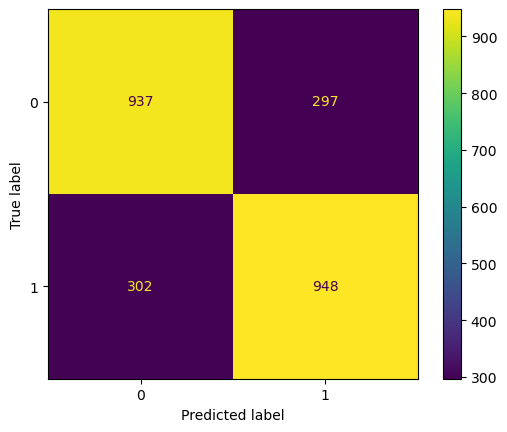

In [ ]:

ConfusionMatrixDisplay.from_estimator(stacked_model, X_test, y_test);

In [ ]:
# My Best model was a naive bayes 

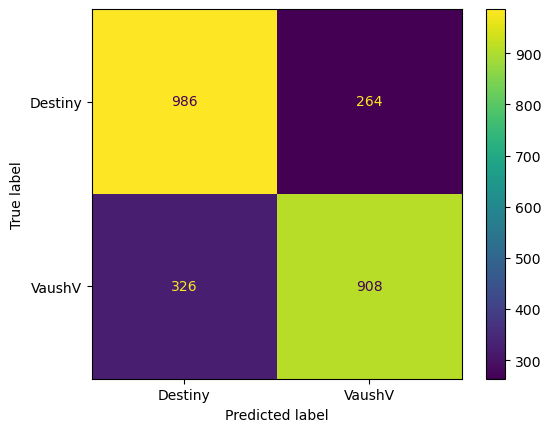

In [ ]:
ConfusionMatrixDisplay.from_estimator(nb_pipe, X_test, y_test);

In [ ]:
import time
import numpy as np


In [ ]:
rf_gs2.best_estimator_

Pipeline(steps=[('cvec',
                 CountVectorizer(max_df=0.9, max_features=15000,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('ss', StandardScaler(with_mean=False)),
                ('rf',
                 RandomForestClassifier(ccp_alpha=0, min_samples_split=5))])

Below I model a copy of the random forest above in order to see which features are most important for that model

In [3]:
forest = pd.read_csv('https://raw.git.generalassemb.ly/ricky-odineverest/P3data/master/LEM_vaush_destiny_cleaned.csv?token=AAALMMGBYHMSOOK3KAIHI2DD2GQ24')

In [4]:
features = ['no_links_2']
X = forest['no_links_2']
y = forest['subreddit'].astype(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [5]:
f_count = CountVectorizer(max_df=0.9, max_features=15000,
                                 ngram_range=(1, 2),
                                 stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])

In [6]:
f_ss=StandardScaler(with_mean=False) 

In [7]:
f_count.fit(X_train)
f_count.fit(X_test)

CountVectorizer(max_df=0.9, max_features=15000, ngram_range=(1, 2),
                stop_words=['i', 'me', 'my', 'myself', 'we', 'our', 'ours',
                            'ourselves', 'you', "you're", "you've", "you'll",
                            "you'd", 'your', 'yours', 'yourself', 'yourselves',
                            'he', 'him', 'his', 'himself', 'she', "she's",
                            'her', 'hers', 'herself', 'it', "it's", 'its',
                            'itself', ...])

In [8]:
f_vec = f_count.transform(X_train)
X_test = f_count.transform(X_test)

In [9]:
f_ss.fit(f_vec)
f_ss.fit(X_test )

StandardScaler(with_mean=False)

In [10]:
f_vec_ss = f_ss.transform(f_vec)
X_test = f_ss.transform(X_test)

In [11]:
rf = RandomForestClassifier(ccp_alpha=0, min_samples_split=5)

In [12]:
f_vec_ss.shape


(7450, 15000)

In [13]:
y_train.shape

(7450,)

In [14]:
rf.fit(f_vec_ss, y_train)

RandomForestClassifier(ccp_alpha=0, min_samples_split=5)

In [15]:
rf.score(f_vec_ss, y_train)


0.9836241610738256

In [16]:
rf.score(X_test, y_test)

0.7395330112721417

In [27]:
vd_forest_bare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9934 entries, 0 to 9933
Columns: 15001 entries, 00 to subreddit
dtypes: float64(15000), object(1)
memory usage: 1.1+ GB


In [17]:
rf.feature_importances_

array([2.49070274e-05, 2.64865377e-04, 0.00000000e+00, ...,
       1.86775804e-07, 4.16506448e-04, 6.80178007e-08])

The code below to create the chart came from chat gpt


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier

# Create count vectorized data
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data)

# Train Random Forest model
rf = RandomForestClassifier()
rf.fit(X, labels)

# Get feature importances
importances = rf.feature_importances_

# Get feature names
feature_names = vectorizer.get_feature_names()

# Sort features by importance
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))


In [18]:
importances = rf.feature_importances_
feature_names = f_count.get_feature_names()

/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [19]:
indices = np.argsort(importances)[::-1]

In [20]:
N = 50
top_N_indices = indices[:N]
top_N_features = [feature_names[i] for i in top_N_indices]

In [21]:
top_N_features 

['destiny',
 'vaush',
 'dgg',
 'sneako',
 'shoe',
 'redacted',
 'the',
 'lav',
 'dan',
 'steven',
 'trans',
 'is',
 'aba',
 'to',
 'destiny is',
 'and',
 'drama',
 'lex',
 'this',
 'of',
 'stream',
 'on',
 'factorio',
 'in',
 'hasan',
 'dggl',
 'leftist',
 'poll',
 'for',
 'are',
 'ye',
 'tate',
 'mr',
 'anti',
 'that',
 'with',
 'thoughts',
 'nick',
 'be',
 'zherka',
 'what',
 'republicans',
 'about',
 'wing',
 'destiny and',
 'right',
 'was',
 'darius',
 'like',
 'so']

In [28]:
N = 20
top_N_indices = indices[:N]
top_N_features = [feature_names[i] for i in top_N_indices]

Text(0.5, 1.0, 'Feature Importance (Random Forest)')

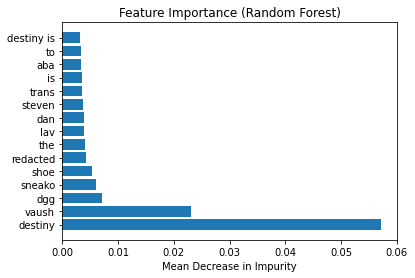

In [25]:
plt.barh(range(N), importances[top_N_indices], align='center')
plt.yticks(range(N), [feature_names[i] for i in top_N_indices])
plt.xlabel('Mean Decrease in Impurity')
plt.title('Feature Importance (Random Forest)')

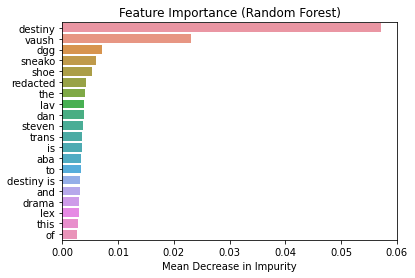

In [29]:
import seaborn as sns

# Create bar chart
sns.barplot(x=importances[top_N_indices], y=[feature_names[i] for i in top_N_indices],orient='h')
plt.xlabel('Mean Decrease in Impurity')
plt.title('Feature Importance (Random Forest)')

# Show chart
plt.show()

This chart shows that the features with the most importance came from destinies subreddit after the names themselves.

The only phrases more predominent on the Vaaush subbreddit on this list are tran and shoe